#### Reading Dataset

In [411]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

used_cars = pd.read_csv('autos.csv')
used_cars = used_cars.dropna()
#used_cars = used_cars.head(1000)
used_cars = used_cars.reset_index(drop=True)
pd.set_option('display.max_columns', None)
print(used_cars.tail(6))

         index          dateCrawled  \
260950  371518  2016-04-02 20:37:03   
260951  371520  2016-03-19 19:53:49   
260952  371521  2016-03-27 20:36:20   
260953  371524  2016-03-05 19:56:21   
260954  371525  2016-03-19 18:57:12   
260955  371527  2016-03-07 19:39:19   

                                                name  seller offerType  price  \
260950                     Bmw_320_D_DPF_Touring_!!!  privat   Angebot   3999   
260951                                  turbo_defekt  privat   Angebot   3200   
260952            Opel_Zafira_1.6_Elegance_TÜV_12/16  privat   Angebot   1150   
260953         Smart_smart_leistungssteigerung_100ps  privat   Angebot   1199   
260954            Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   Angebot   9200   
260955  BMW_M135i_vollausgestattet_NP_52.720____Euro  privat   Angebot  28990   

         abtest vehicleType  yearOfRegistration    gearbox  powerPS  \
260950     test       kombi                2005    manuell        3   
260951  control 

In [400]:
columns = used_cars.columns
column_names= []
for column_name in columns:
    column_names.append(column_name)   

print(column_names)

['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']


In [401]:
car_models = used_cars['model'].unique()
print(car_models)
for car_model in car_models:
    if car_model == "g":
        print("it exists")


# Subset the DataFrame based on the 'models' column having the value 'duster'
duster_cars = used_cars[used_cars['model'] == 'duster']
duster_suvs = duster_cars[duster_cars['vehicleType'] == 'suv']

duster_suvs_2010 = duster_suvs[duster_suvs['yearOfRegistration']== 2010]

duster_cars_models = duster_suvs_2010['yearOfRegistration'].unique()
print(duster_cars_models)

['golf' 'fabia' '3er' '2_reihe' 'andere' '3_reihe' 'passat' 'navara'
 'twingo' 'c_max' 'a_klasse' 'scirocco' '5er' 'arosa' 'civic'
 'transporter' 'punto' 'e_klasse' 'one' 'clio' '1er' 'b_klasse' 'astra'
 'fortwo' 'a8' 'jetta' 'polo' 'fiesta' 'c_klasse' 'micra' 'vito'
 'sprinter' '156' 'escort' 'forester' 'scenic' 'a1' 'combo' 'focus' 'tt'
 'a6' 'jazz' 'slk' '7er' '80' '147' 'glk' 'meriva' 'z_reihe' 'v40' 'ibiza'
 'mustang' 'eos' 'a4' 'touran' 'getz' 'insignia' 'megane' 'a3' 'lupo'
 'r19' 'colt' 'corsa' 'vectra' 'berlingo' 'm_klasse' 'tiguan' 'sharan'
 '6_reihe' 'c4' 'panda' 'up' 'i_reihe' 'ceed' 'kangoo' '5_reihe' 'yeti'
 'octavia' 'zafira' 'mii' 'rx_reihe' 'mondeo' '6er' 'fox' 'matiz' 'beetle'
 'rio' 'touareg' 'logan' 'omega' 'cuore' 's_max' 'modus' 'a2' 'x_reihe'
 'a5' 'galaxy' 'c3' 'viano' 's_klasse' 'avensis' 'sl' 'roomster' 'q5'
 'kaefer' 'santa' 'cooper' 'leon' 'sportage' 'caddy' 'clk' 'primera'
 '4_reihe' 'espace' 'exeo' 'juke' '1_reihe' 'accord' 'corolla' 'grand'
 'phaeton' 'bo

In [402]:
display(duster_suvs_2010[['model', 'vehicleType', 'price', 'kilometer', 'yearOfRegistration']].tail(5))

,model,vehicleType,price,kilometer,yearOfRegistration
236099,duster,suv,8400,100000,2010
243472,duster,suv,7000,125000,2010
244727,duster,suv,9950,70000,2010
250782,duster,suv,5300,80000,2010
253118,duster,suv,9300,80000,2010


In [403]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [404]:
y_predicted = km.fit_predict(duster_suvs_2010[['kilometer', 'price']])
duster_suvs_2010['cluster'] = y_predicted


y_predicted

/Users/justinakagha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 3, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 3, 2, 3, 1, 0, 3, 2, 2,
       1, 2, 3, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 1], dtype=int32)

In [405]:
duster_suvs_2010['cluster'] = y_predicted
duster_suvs_2010.head(3)

/var/folders/l9/yvbj6fz177b93d32gv9w_f9r0000gn/T/ipykernel_2042/540929193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duster_suvs_2010['cluster'] = y_predicted


,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,cluster
1076,1566,2016-03-13 14:48:04,Duster_1_5_Diesel_2Jahre_TÜV_Bj_2010_Klima_4mal2,privat,Angebot,5800,test,suv,2010,manuell,86,duster,150000,7,diesel,dacia,nein,2016-03-13 00:00:00,0,47166,2016-04-06 16:17:07,0
5588,7973,2016-03-11 13:25:22,Dacia_Duster_1.6_16V_4x2_Prestige__1._Hand,privat,Angebot,7650,test,suv,2010,manuell,105,duster,90000,11,benzin,dacia,nein,2016-03-11 00:00:00,0,61184,2016-04-06 13:17:14,2
10895,15509,2016-03-24 14:59:10,Dacia_Duster_dCi_110_FAP_4x2_Laureate,privat,Angebot,11350,test,suv,2010,manuell,107,duster,30000,8,diesel,dacia,nein,2016-03-24 00:00:00,0,73630,2016-04-07 07:45:18,3


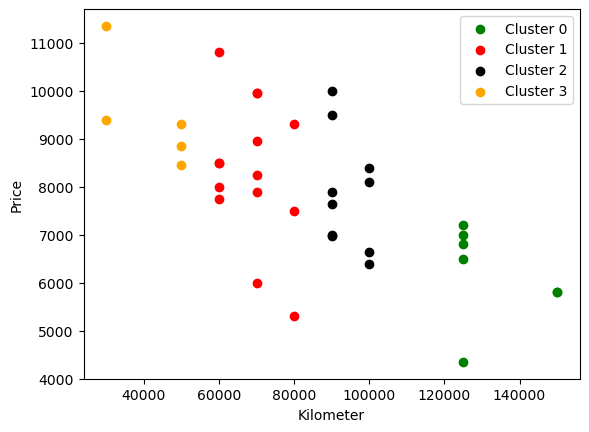

In [406]:
df1 = duster_suvs_2010[duster_suvs_2010.cluster == 0]
df2 = duster_suvs_2010[duster_suvs_2010.cluster == 1]
df3 = duster_suvs_2010[duster_suvs_2010.cluster == 2]
df4 = duster_suvs_2010[duster_suvs_2010.cluster == 3]

plt.scatter(df1['kilometer'], df1['price'], color='green', label='Cluster 0')
plt.scatter(df2['kilometer'], df2['price'], color='red', label='Cluster 1')
plt.scatter(df3['kilometer'], df3['price'], color='black', label='Cluster 2')
plt.scatter(df4['kilometer'], df4['price'], color='orange', label='Cluster 3')

plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.legend()

plt.show()

#### Make the price scales 0 to 1

In [407]:
# Reshape the input data
prices = duster_suvs_2010['price'].values.reshape(-1, 1)
kilometer = duster_suvs_2010['kilometer'].values.reshape(-1, 1)


scaler = MinMaxScaler()
scaler.fit(prices)
duster_suvs_2010['price'] = scaler.transform(prices)

scaler = MinMaxScaler()
scaler.fit(kilometer)
duster_suvs_2010['kilometer'] = scaler.transform(kilometer)

/var/folders/l9/yvbj6fz177b93d32gv9w_f9r0000gn/T/ipykernel_2042/2482781657.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duster_suvs_2010['price'] = scaler.transform(prices)
/var/folders/l9/yvbj6fz177b93d32gv9w_f9r0000gn/T/ipykernel_2042/2482781657.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duster_suvs_2010['kilometer'] = scaler.transform(kilometer)


In [389]:
km.cluster_centers_

array([[0.5       , 0.38998701],
       [0.85119048, 0.26530612],
       [0.22727273, 0.5974026 ],
       [0.33333333, 0.82446939]])

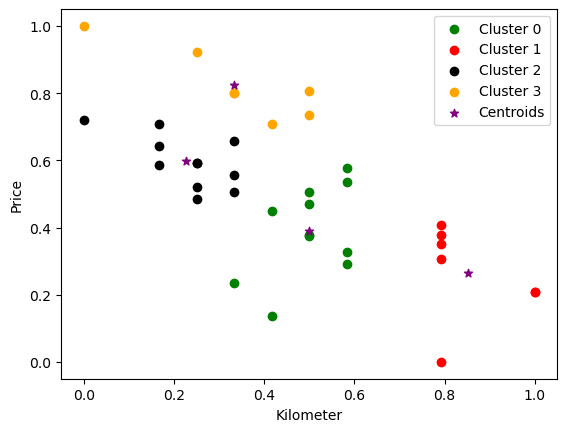

In [396]:
df1 = duster_suvs_2010[duster_suvs_2010.cluster == 0]
df2 = duster_suvs_2010[duster_suvs_2010.cluster == 1]
df3 = duster_suvs_2010[duster_suvs_2010.cluster == 2]
df4 = duster_suvs_2010[duster_suvs_2010.cluster == 3]

plt.scatter(df1['kilometer'], df1['price'], color='green', label='Cluster 0')
plt.scatter(df2['kilometer'], df2['price'], color='red', label='Cluster 1')
plt.scatter(df3['kilometer'], df3['price'], color='black', label='Cluster 2')
plt.scatter(df4['kilometer'], df4['price'], color='orange', label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker="*", label='Centroids')

plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.legend()

plt.show()

In [397]:
duster_suvs_2010['yearOfRegistration'].head(5)

1076     2010
5588     2010
10895    2010
13085    2010
17550    2010
Name: yearOfRegistration, dtype: int64

In [398]:
display(duster_suvs_2010[['model', 'vehicleType', 'price', 'kilometer', 'yearOfRegistration', 'cluster']].head())

,model,vehicleType,price,kilometer,yearOfRegistration,cluster
1076,duster,suv,0.207143,1.000000,2010,1
5588,duster,suv,0.471429,0.500000,2010,0
10895,duster,suv,1.000000,0.000000,2010,3
13085,duster,suv,0.657857,0.333333,2010,2
17550,duster,suv,0.800000,0.333333,2010,3


In [45]:
display(used_cars.head(3))


,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


In [46]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
your_data = pd.read_csv('autos.csv')  # Replace 'your_dataset.csv' with the path to your dataset file

# Drop non-numeric columns
your_data_numeric = your_data.select_dtypes(include=['int', 'float'])

# Drop rows with null values
your_data_numeric.dropna(inplace=True)

# Feature Selection
X_train = your_data_numeric.drop('price', axis=1)
y_train = your_data_numeric['price']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train a Ridge regression model
alpha = 1.0  # Regularization strength (hyperparameter)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Now, prepare the new data for prediction
new_data = {
    'yearOfRegistration': [2005],  # Example new data
    'powerPS': [85],  # Example new data
    'kilometer': [120000]  # Example new data
}

# Create a DataFrame for the new data
new_data_df = pd.DataFrame(new_data)

# Ensure that the new data has the same columns as the training data
columns_to_keep = X_train.columns.intersection(new_data_df.columns)
new_data_df = new_data_df[columns_to_keep]

# Standardize the new data using the same scaler used for training
new_data_scaled = scaler.transform(new_data_df)

# Predict
predicted_price = ridge_model.predict(new_data_scaled)

print("Predicted Price:", predicted_price)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- index
- monthOfRegistration
- nrOfPictures
- postalCode
